<sub><sup>Copyright (C) 2025 J. Heinzmann, A. Benady, ETH Zürich</sub></sup>

<sub><sup>
This file is part of the `nlfea` package for the course Computational Mechanics II: Nonlinear FEA at ETH Zurich.
This software is exclusively intended for personal, educational purposes only in the context of the above course.
It must not be used outside of this scope without the explicit consent of the author(s).
</sub></sup>

# Project 2


This project deals with the concept of stability, with a focus on the arc-length method and bisection algrotithm for the critical points search.
This notebook will guide you through all the necessary steps. Please do not modify any parts of the library code, unless specifically requested by the
tasks of the assignment.


## 1. Path following method


First, we need to import all necessary dependencies.

In [1]:
# external dependencies
import numpy as np

# internal dependencies
from nlfea import Model, Solver, mesh, materials, elements, solution, post

**TASK 1:** Implement the predictor step in the function `predict()` in the file `solution/arclength.py`


**TASK 2:** Implement the corrector steps in the function `solve()` in the file `solution/arclength.py`

The following cell is here to help you test your implementation. You can run the cell to check your implementation against the analytical solution already provided in the code.

model dimension:		2
chosen element:			bar
number of nodes:		3
number of elements:		2
number of DOFs:			6

___________________________________________________________________________ 
increment: 0
		iteration: 0, residual_norm=1.0
		iteration: 1, residual_norm=0.010065059780807151
		iteration: 2, residual_norm=2.934238513336245e-06
		iteration: 3, residual_norm=2.4332412357860912e-14
___________________________________________________________________________ 
increment: 1
		iteration: 0, residual_norm=1.0
		iteration: 1, residual_norm=0.014835689521503131
		iteration: 2, residual_norm=3.609639920476871e-05
		iteration: 3, residual_norm=1.2548127621741503e-11
___________________________________________________________________________ 
increment: 2
		iteration: 0, residual_norm=1.0
		iteration: 1, residual_norm=0.014243476040007993
		iteration: 2, residual_norm=0.0003414601265817237
		iteration: 3, residual_norm=7.422902451443393e-10
_______________________________________________________

d:\Temp_until_sync\Nonlinear_FEA\nonlin-fea-assn\Project_2\nlfea\solution\arclength.py:37: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Δu_λ = sparse_linalg.spsolve(Ktan, Fext)



solution finished after 0.218s


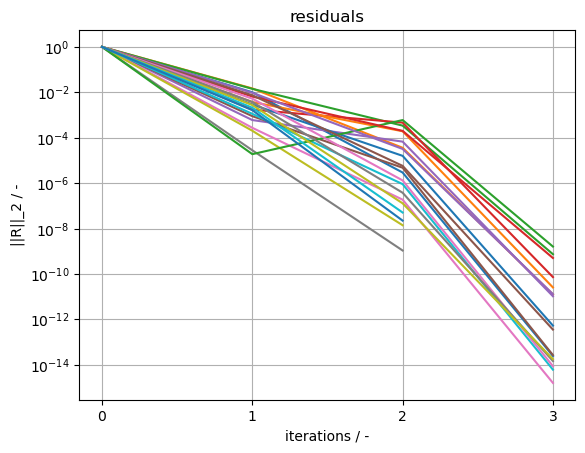

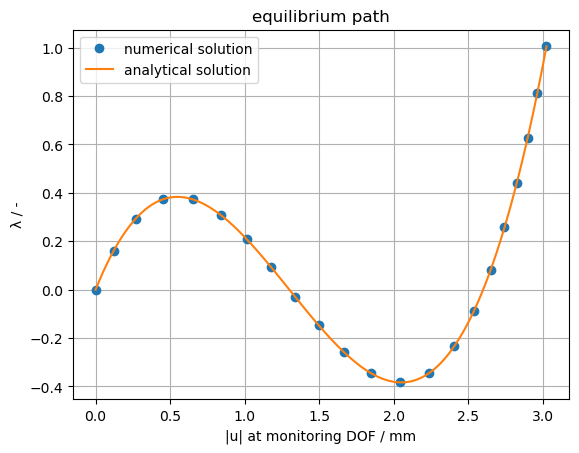

In [2]:
# initialize empty model object
model_arclength = Model()

# mesh
B = 1.0
H = 1.3
(model_arclength.nodes, model_arclength.connectivity) = mesh.truss.von_mises(B, H)

# define type of element
model_arclength.parent_element = elements.Bar(kinematics="nonlinear", A=0.1)

# material definition
model_arclength.material = materials.Hooke(E=10)

# Dirichlet BCs
bottom_nodes = [0, 2]
model_arclength.dirichlet_bcs = (("fix_X", bottom_nodes), ("fix_Y", bottom_nodes))

# point loads
model_arclength.point_loads = (("F_Y", [1], -0.5),)

# solver parameters
solver_arclength = Solver()
solver_arclength.num_increments = 50
solver_arclength.tolerance_nr = 1e-7
solver_arclength.max_iter = 10
solver_arclength.control_method = "arclength"
solver_arclength.control_size = 0.2
solver_arclength.stability_analysis = False

# get DOF used for the monitoring in the plots
monitoring_node_dof = np.array([[1, 1]])
solver_arclength.monitoring_dof = int(
    monitoring_node_dof[0, 0] * 2 + monitoring_node_dof[0, 1]
)

# set output directory
solver_arclength.result_dir = "project2_vonMises_arclength"

# preprocess model and start computations
model_arclength.prepare()
solution.incremental.solve(model_arclength, solver_arclength)

# plot residuals
post.plots.residuals(solver_arclength.monitoring)


def analytical_solution_nonlinear(u):
    # note: the plot below will show the absolute value of u
    return (
        -(
            model_arclength.material[0].E
            * model_arclength.parent_element.A
            / model_arclength.point_loads[0][2]
        )
        * (H / np.sqrt(H**2 + B**2)) ** 3
        * ((u / H) ** 3 - 3 * (u / H) ** 2 + 2 * (u) / H)
    )


# plot results
post.plots.equilibrium_path(solver_arclength.monitoring, analytical_solution_nonlinear)


## 2. Bisection for critical points

Add the missing steps in `solution/bisection.py` to perform a bisection and run the following cell.

The model setup is identical to before, but notice the changes in the solver setup.

model dimension:		2
chosen element:			bar
number of nodes:		3
number of elements:		2
number of DOFs:			6

___________________________________________________________________________ 
increment: 0
		iteration: 0, residual_norm=1.0
		iteration: 1, residual_norm=0.010065059780807151
		iteration: 2, residual_norm=2.934238513336245e-06
		iteration: 3, residual_norm=2.4332412357860912e-14
___________________________________________________________________________ 
increment: 1
		iteration: 0, residual_norm=1.0
		iteration: 1, residual_norm=0.014835689521503131
		iteration: 2, residual_norm=3.609639920476871e-05
		iteration: 3, residual_norm=1.2548127621741503e-11
___________________________________________________________________________ 
increment: 2
		iteration: 0, residual_norm=1.0
		iteration: 1, residual_norm=0.014243476040007993
		iteration: 2, residual_norm=0.0003414601265817237
		iteration: 3, residual_norm=7.422902451443393e-10
_______________________________________________________

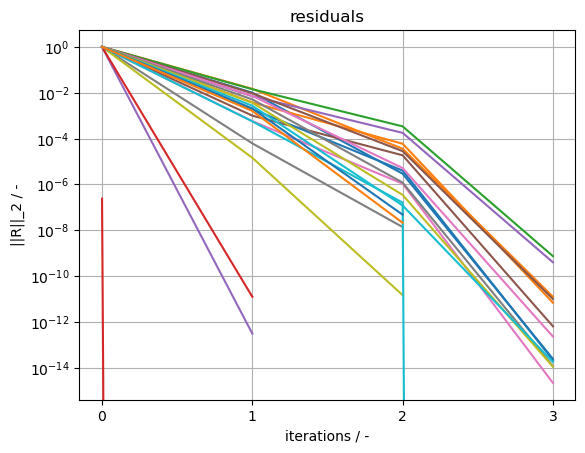

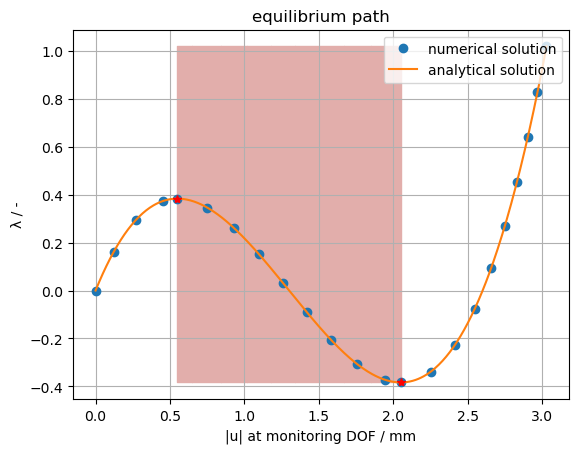

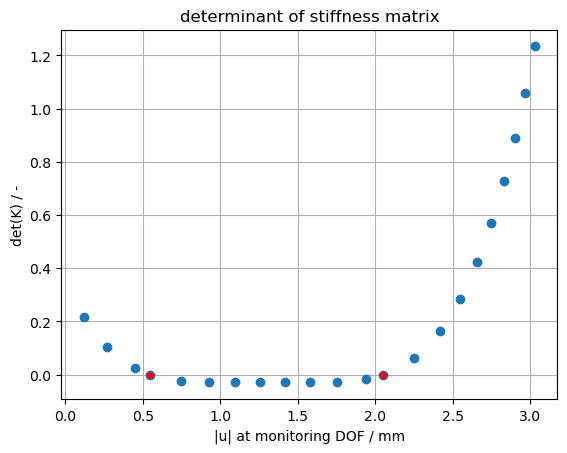

In [3]:
# initialize empty model object
model_bisection = Model()

# mesh
B = 1.0
H = 1.3
(model_bisection.nodes, model_bisection.connectivity) = mesh.truss.von_mises(B, H)

# define type of element
model_bisection.parent_element = elements.Bar(kinematics="nonlinear", A=0.1)

# material definition
model_bisection.material = materials.Hooke(E=10)

# Dirichlet BCs
bottom_nodes = [0, 2]
model_bisection.dirichlet_bcs = (("fix_X", bottom_nodes), ("fix_Y", bottom_nodes))

# point loads
model_bisection.point_loads = (("F_Y", [1], -0.5),)

# solver parameters
solver_bisection = Solver()
solver_bisection.num_increments = 50
solver_bisection.tolerance_nr = 1e-7
solver_bisection.max_iter = 10
solver_bisection.control_method = "arclength"
solver_bisection.control_size = 0.2
solver_bisection.stability_analysis = True
solver_bisection.tolerance_detK = 1e-5
solver_bisection.max_bisection_iter = 20
solver_bisection.perturbation = False

# get DOF used for the monitoring in the plots
monitoring_node_dof = np.array([[1, 1]])
solver_bisection.monitoring_dof = int(
    monitoring_node_dof[0, 0] * 2 + monitoring_node_dof[0, 1]
)

# set output directory
solver_bisection.result_dir = "project2_vonMises_bisection"

# preprocess model and start computations
model_bisection.prepare()
solution.incremental.solve(model_bisection, solver_bisection)

# plot residuals
post.plots.residuals(solver_bisection.monitoring)


# plot equilibrium path and determinant of the stiffness matrix
post.plots.equilibrium_path(
    solver_bisection.monitoring, analytical_solution=analytical_solution_nonlinear
)

post.plots.detK_displacement(solver_bisection.monitoring)

Check your bisection algorithm with the 3D problem provided in the next cell and perform a perturbation at the first bifurcation point.
For this, set `solver.perturbation = True`.

model dimension:		3
chosen element:			bar
number of nodes:		6
number of elements:		9
number of DOFs:			18

___________________________________________________________________________ 
increment: 0
		iteration: 0, residual_norm=1.0
		iteration: 1, residual_norm=1.6861571988068746e-05
		iteration: 2, residual_norm=2.6588976719742927e-10
___________________________________________________________________________ 
increment: 1
		iteration: 0, residual_norm=1.0
		iteration: 1, residual_norm=1.6595473245837584e-05
		iteration: 2, residual_norm=2.839542339724276e-10
___________________________________________________________________________ 
increment: 2
		iteration: 0, residual_norm=1.0
		iteration: 1, residual_norm=1.6303794892457666e-05
		iteration: 2, residual_norm=3.0301104530389026e-10
___________________________________________________________________________ 
increment: 3
		iteration: 0, residual_norm=1.0
		iteration: 1, residual_norm=1.5986632681374585e-05
		iteration: 2, residual_no

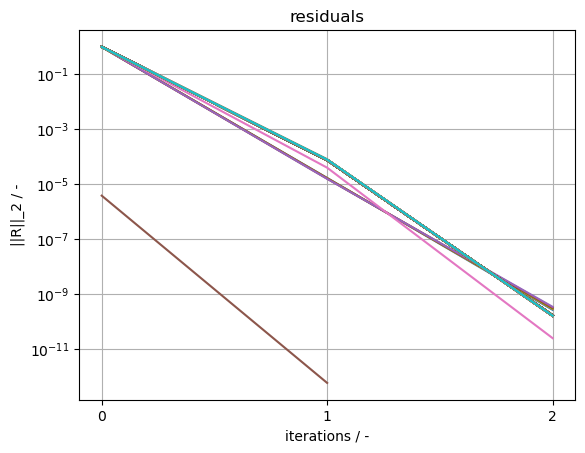

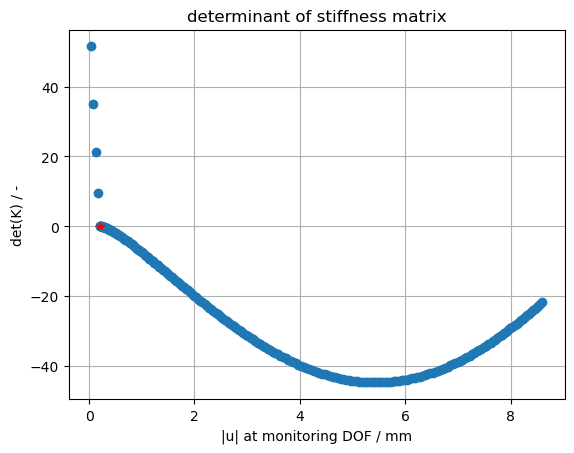

Widget(value='<iframe src="http://localhost:64287/index.html?ui=P_0x1ab20f46660_0&reconnect=auto" class="pyvis…

In [4]:
# initialize empty model object
model_tent = Model()

# mesh
(model_tent.nodes, model_tent.connectivity) = mesh.truss.tent()

# define type of element
model_tent.parent_element = elements.Bar(kinematics="nonlinear", A=1)

# material definition
model_tent.material = materials.Hooke(E=10)

# Dirichlet BCs
bottom_nodes = [0, 2, 3, 5]
model_tent.dirichlet_bcs = (
    ("fix_X", bottom_nodes),
    ("fix_Y", bottom_nodes),
    ("fix_Z", bottom_nodes),
)

# point loads
model_tent.point_loads = (("F_Z", [1, 4], 5.7),)

# solver parameters
solver_tent = Solver()
solver_tent.num_increments = 220
solver_tent.tolerance_nr = 1e-8
solver_tent.max_iter = 10
solver_tent.control_method = "arclength"
solver_tent.control_size = 0.07
solver_tent.stability_analysis = True
solver_tent.tolerance_detK = 1e-4
solver_tent.max_bisection_iter = 20
solver_tent.perturbation = True

# get DOF used for the monitoring in the plots
monitoring_node_dof = np.array([[1, 2]])
solver_tent.monitoring_dof = int(
    monitoring_node_dof[0, 0] * 3 + monitoring_node_dof[0, 1]
)

# set output directory
solver_tent.result_dir = "project2_tent"

# preprocess model and start computations
model_tent.prepare()
solution.incremental.solve(model_tent, solver_tent)

# plot residuals
post.plots.residuals(solver_tent.monitoring)

# plot determinant of the stiffness matrix
post.plots.detK_displacement(solver_tent.monitoring)

# plot deformed mesh
post.interactive.truss(solver_tent.result_dir, field="u")


For this project, submit this Jupyter notebook as well as the files

- `solution/bisection.py`
- `solution/arclength.py`